In [15]:
## IMPORTAR LIBRERIAS
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import rasterio
from matplotlib.patches import Patch 

In [53]:
# Cargar las capas vectoriales
gdf_veredas = gpd.read_file('C:/Users/mario/Documents/Programación SIG/TALLER_GITHUB/VEREDA_RURAL/LA_UNION_VEREDAS.gpkg')  # Capa 1
gdf_rios = gpd.read_file('C:/Users/mario/Documents/Programación SIG/TALLER_GITHUB/RIOS/LA_UNION_RIOS.gpkg') # Capa 2


No se encontraron geometrías de 'ríos' que toquen 'veredas'.


C:\Users\mario.celis\anaconda3\Lib\site-packages\geopandas\plotting.py:968: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  return plot_dataframe(data, *args, **kwargs)


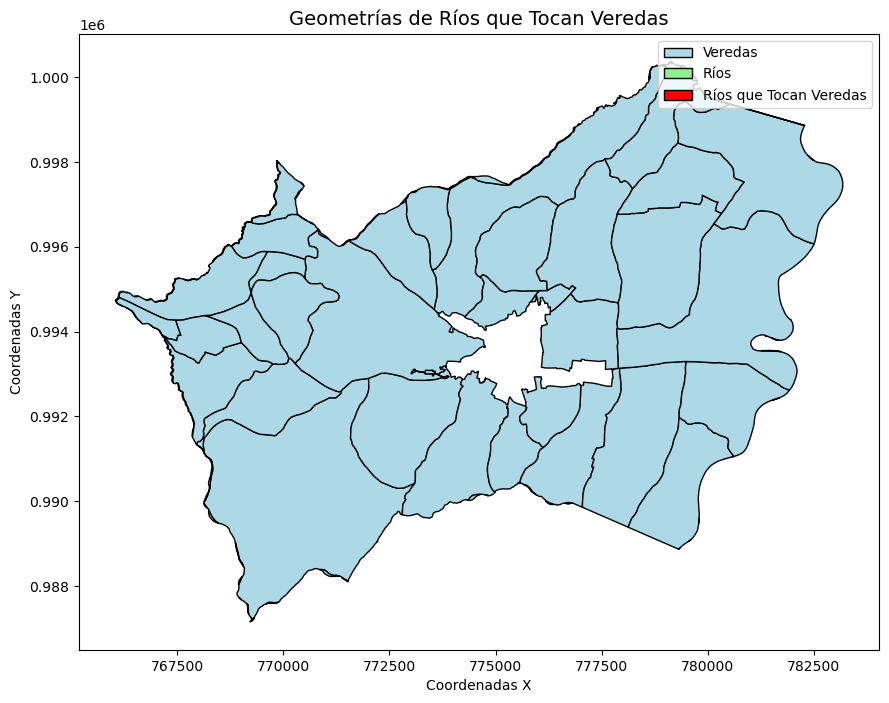

In [87]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Cargar las capas vectoriales
gdf_veredas = gpd.read_file('C:/Users/mario/Documents/Programación SIG/TALLER_GITHUB/VEREDA_RURAL/LA_UNION_VEREDAS.gpkg')  # Capa 1
gdf_rios = gpd.read_file('C:/Users/mario/Documents/Programación SIG/TALLER_GITHUB/RIOS/LA_UNION_RIOS.gpkg')  # Capa 2

# Verificar si las capas están vacías
if gdf_veredas.empty:
    print("La capa 'gdf_veredas' está vacía.")
if gdf_rios.empty:
    print("La capa 'gdf_rios' está vacía.")

# Verificar y unificar sistemas de coordenadas (CRS)
if not gdf_veredas.empty and not gdf_rios.empty:
    if gdf_veredas.crs != gdf_rios.crs:
        gdf_veredas = gdf_veredas.to_crs(gdf_rios.crs)

    # Reparar geometrías inválidas si es necesario
    gdf_veredas['geometry'] = gdf_veredas.geometry.buffer(0)
    gdf_rios['geometry'] = gdf_rios.geometry.buffer(0)

    # Filtrar geometrías de ríos que tocan las veredas
    gdf_touches = gdf_rios[gdf_rios.geometry.apply(lambda geom: any(gdf_veredas.geometry.touches(geom)))]

    # Verificar si el resultado está vacío
    if gdf_touches.empty:
        print("No se encontraron geometrías de 'ríos' que toquen 'veredas'.")
    else:
        print(f"Número de geometrías en Ríos que tocan Veredas: {len(gdf_touches)}")

    # Graficar los resultados
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    gdf_veredas.plot(ax=ax, color='lightblue', edgecolor='black', label='Veredas')
    gdf_rios.plot(ax=ax, color='lightgreen', edgecolor='black', label='Ríos')

    if not gdf_touches.empty:
        gdf_touches.plot(ax=ax, color='red', edgecolor='black', label='Ríos que Tocan Veredas')

    # Personalizar el mapa
    ax.set_title('Geometrías de Ríos que Tocan Veredas', fontsize=14)
    ax.set_xlabel('Coordenadas X')
    ax.set_ylabel('Coordenadas Y')

    # Crear una leyenda personalizada
    legend_elements = [
        Patch(facecolor='lightblue', edgecolor='black', label='Veredas'),
        Patch(facecolor='lightgreen', edgecolor='black', label='Ríos'),
        Patch(facecolor='red', edgecolor='black', label='Ríos que Tocan Veredas')
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=10)

    # Mostrar el mapa
    plt.show()
else:
    print("Una o ambas capas están vacías. Verifique las rutas o el contenido de las capas.")


Se encontraron 18 ríos que cruzan las veredas.


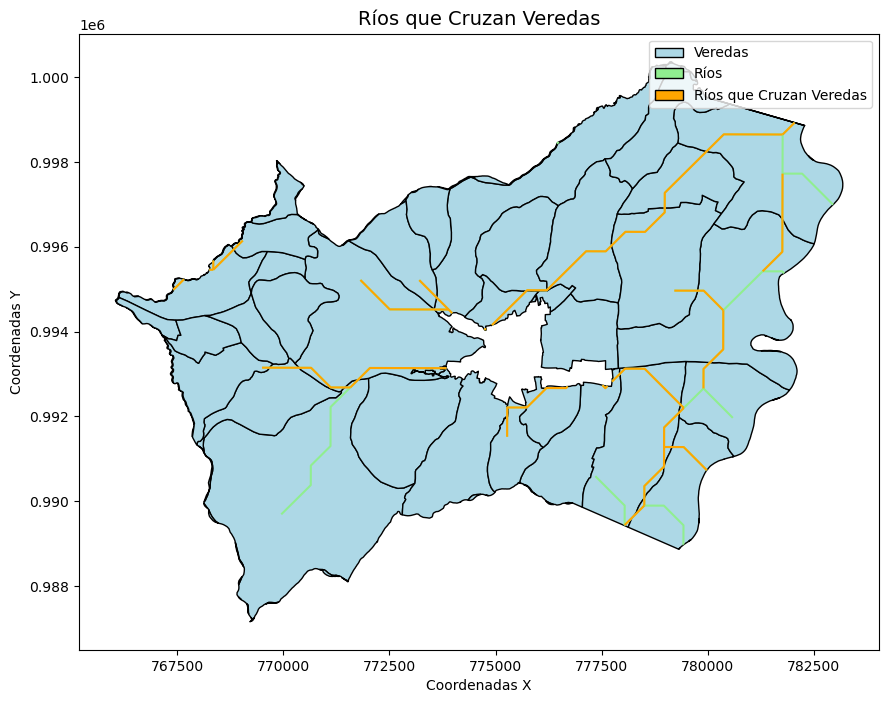

In [79]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Cargar las capas vectoriales
gdf_veredas = gpd.read_file('C:/Users/mario/Documents/Programación SIG/TALLER_GITHUB/VEREDA_RURAL/LA_UNION_VEREDAS.gpkg')  # Capa 1
gdf_rios = gpd.read_file('C:/Users/mario/Documents/Programación SIG/TALLER_GITHUB/RIOS/LA_UNION_RIOS.gpkg')  # Capa 2

# Encontrar los ríos que cruzan las veredas
gdf_crosses = gdf_rios[gdf_rios.geometry.apply(lambda geom: any(gdf_veredas.geometry.crosses(geom)))]

# Verificar si hay geometrías que cruzan
if gdf_crosses.empty:
    print("No se encontraron ríos que crucen las veredas.")
else:
    print(f"Se encontraron {len(gdf_crosses)} ríos que cruzan las veredas.")

    # Crear el mapa
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    # Dibujar capas
    gdf_veredas.plot(ax=ax, color='lightblue', edgecolor='black', label='Veredas')
    gdf_rios.plot(ax=ax, color='lightgreen', edgecolor='black', label='Ríos')
    gdf_crosses.plot(ax=ax, color='orange', edgecolor='black', label='Ríos que Cruzan Veredas')

    # Personalizar el mapa
    ax.set_title('Ríos que Cruzan Veredas', fontsize=14)
    ax.set_xlabel('Coordenadas X')
    ax.set_ylabel('Coordenadas Y')

    # Crear una leyenda personalizada
    legend_elements = [
        Patch(facecolor='lightblue', edgecolor='black', label='Veredas'),
        Patch(facecolor='lightgreen', edgecolor='black', label='Ríos'),
        Patch(facecolor='orange', edgecolor='black', label='Ríos que Cruzan Veredas'),
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=10)

    # Mostrar el mapa
    plt.show()


No se encontraron geometrías de 'ríos' que se superpongan con 'veredas'.


C:\Users\mario.celis\anaconda3\Lib\site-packages\geopandas\plotting.py:968: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  return plot_dataframe(data, *args, **kwargs)


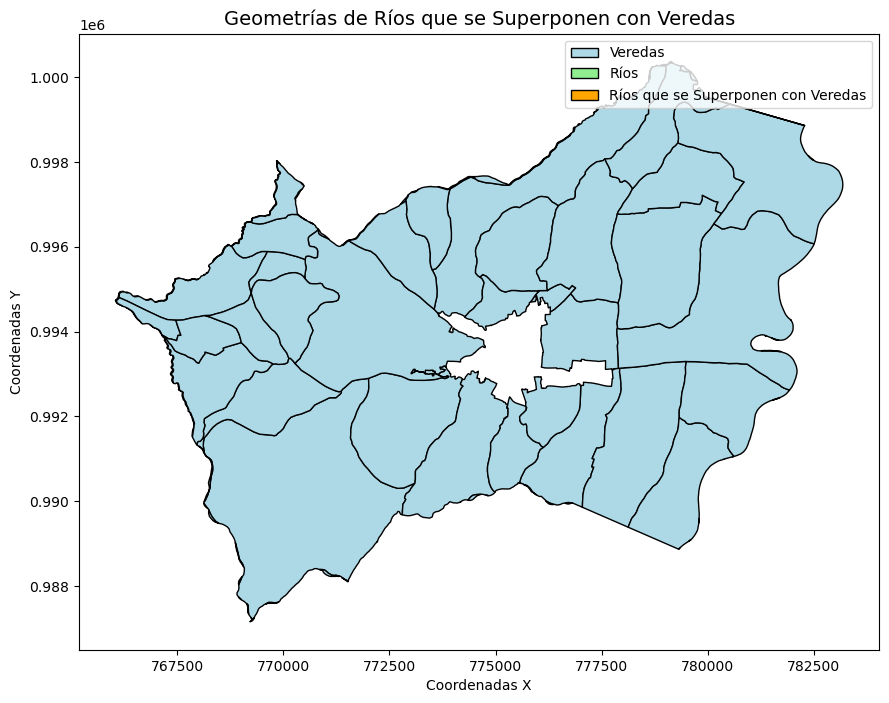

In [85]:
# Cargar las capas vectoriales
gdf_veredas = gpd.read_file('C:/Users/mario/Documents/Programación SIG/TALLER_GITHUB/VEREDA_RURAL/LA_UNION_VEREDAS.gpkg')  # Capa 1
gdf_rios = gpd.read_file('C:/Users/mario/Documents/Programación SIG/TALLER_GITHUB/RIOS/LA_UNION_RIOS.gpkg')  # Capa 2

# Verificar si las capas están vacías
if gdf_veredas.empty:
    print("La capa 'gdf_veredas' está vacía.")
if gdf_rios.empty:
    print("La capa 'gdf_rios' está vacía.")

# Verificar y unificar sistemas de coordenadas (CRS)
if not gdf_veredas.empty and not gdf_rios.empty:
    if gdf_veredas.crs != gdf_rios.crs:
        gdf_veredas = gdf_veredas.to_crs(gdf_rios.crs)

    # Reparar geometrías inválidas si es necesario
    gdf_veredas['geometry'] = gdf_veredas.geometry.buffer(0)
    gdf_rios['geometry'] = gdf_rios.geometry.buffer(0)

    # Filtrar geometrías de ríos que se superponen con veredas
    gdf_overlaps = gdf_rios[gdf_rios.geometry.apply(lambda geom: any(gdf_veredas.geometry.overlaps(geom)))]

    # Verificar si el resultado está vacío
    if gdf_overlaps.empty:
        print("No se encontraron geometrías de 'ríos' que se superpongan con 'veredas'.")
    else:
        print(f"Número de geometrías en Ríos que se superponen con Veredas: {len(gdf_overlaps)}")

    # Graficar los resultados
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    gdf_veredas.plot(ax=ax, color='lightblue', edgecolor='black', label='Veredas')
    gdf_rios.plot(ax=ax, color='lightgreen', edgecolor='black', label='Ríos')

    if not gdf_overlaps.empty:
        gdf_overlaps.plot(ax=ax, color='orange', edgecolor='black', label='Ríos que se Superponen con Veredas')

    # Personalizar el mapa
    ax.set_title('Geometrías de Ríos que se Superponen con Veredas', fontsize=14)
    ax.set_xlabel('Coordenadas X')
    ax.set_ylabel('Coordenadas Y')

    # Crear una leyenda personalizada
    legend_elements = [
        Patch(facecolor='lightblue', edgecolor='black', label='Veredas'),
        Patch(facecolor='lightgreen', edgecolor='black', label='Ríos'),
        Patch(facecolor='orange', edgecolor='black', label='Ríos que se Superponen con Veredas')
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=10)

    # Mostrar el mapa
    plt.show()
else:
    print("Una o ambas capas están vacías. Verifique las rutas o el contenido de las capas.")
